In [25]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score

In [26]:
df = pd.read_csv('B-train.csv')


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      180 non-null    float64
 1   x2      180 non-null    float64
 2   x3      181 non-null    float64
 3   x4      180 non-null    float64
 4   x5      181 non-null    float64
 5   x6      180 non-null    float64
 6   x7      180 non-null    float64
 7   x8      180 non-null    float64
 8   y       188 non-null    float64
dtypes: float64(9)
memory usage: 13.5 KB


In [28]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,y
count,180.000000,180.000000,181.000000,180.000000,181.000000,180.000000,180.000000,1.800000e+02,188.000000
mean,14.175056,-12.012278,-2.560663,-0.299167,-0.412044,-0.336167,16.658889,1.547451e+05,2.933298
std,359.088122,334.603527,34.802232,33.528208,33.117881,39.515732,372.753379,9.678893e+05,9.200321
min,-2637.520000,-2049.360000,-250.110000,-233.640000,-216.320000,-282.960000,-1987.360000,4.800000e-01,-19.830000
25%,-67.172500,-93.727500,-9.560000,-6.675000,-8.350000,-7.717500,-72.022500,1.326297e+03,-2.935000
50%,-1.655000,-7.895000,-2.670000,0.440000,-0.090000,0.640000,14.715000,4.897925e+03,2.980000
75%,64.937500,50.365000,6.300000,7.390000,8.130000,7.385000,73.755000,1.438690e+04,8.572500
max,2661.480000,2217.600000,192.870000,194.240000,205.920000,224.400000,2772.630000,7.503436e+06,30.600000


In [29]:
for col in df.columns:
    percentiles = df[col].quantile([0.05, 0.95]).values
    df[col][df[col] <= percentiles[0]] = percentiles[0]
    df[col][df[col] >= percentiles[1]] = percentiles[1]

In [30]:
df[["x2","x1"]].describe(include="all")

,x2,x1
count,180.000000,180.000000
mean,-14.002856,-0.042133
std,98.069081,100.881155
min,-184.170000,-192.792500
25%,-93.727500,-67.172500
50%,-7.895000,-1.655000
75%,50.365000,64.937500
max,163.954000,186.966500


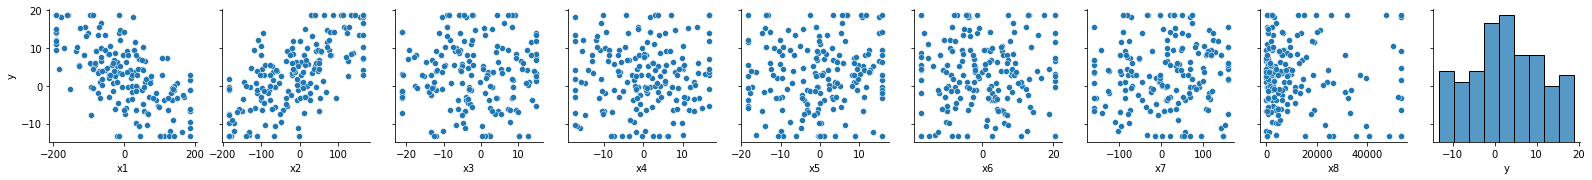

In [31]:
sns.pairplot(df, x_vars=df.columns, y_vars=["y"])

In [32]:
df.corr()
df.corr().sort_values("y")[["y"]]

,y
x1,-0.643639
x8,-0.068276
x3,-0.008979
x4,0.041342
x7,0.044584
x6,0.049326
x5,0.089609
x2,0.670127
y,1.000000


In [33]:
X = df[["x2","x1"]]
y = df["y"]

<AxesSubplot:xlabel='y', ylabel='Count'>

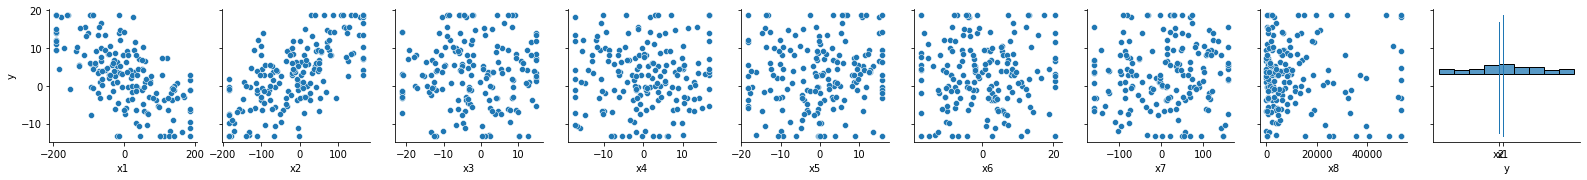

In [34]:
sns.pairplot(df, x_vars=df.columns, y_vars=["y"])
X.boxplot()

In [35]:
df["x2"].fillna(0, inplace=True)
df["x1"].fillna(0, inplace=True)
df["y"].fillna(0, inplace=True)



In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      190 non-null    float64
 1   x2      190 non-null    float64
 2   x3      181 non-null    float64
 3   x4      180 non-null    float64
 4   x5      181 non-null    float64
 5   x6      180 non-null    float64
 6   x7      180 non-null    float64
 7   x8      180 non-null    float64
 8   y       190 non-null    float64
dtypes: float64(9)
memory usage: 13.5 KB


In [37]:
df[["x2","x1"]].describe(include="all")

,x2,x1
count,190.000000,190.000000
mean,-13.265863,-0.039916
std,95.490881,98.176074
min,-184.170000,-192.792500
25%,-89.797500,-66.297500
50%,-4.155000,0.000000
75%,48.487500,58.827500
max,163.954000,186.966500


In [38]:
df.corr()
df.corr().sort_values("y")[["y"]]

,y
x1,-0.610436
x8,-0.065858
x3,-0.005160
x7,0.042305
x4,0.044294
x6,0.045284
x5,0.091870
x2,0.644227
y,1.000000


In [39]:
X = df[["x2","x1"]]
Y = df["y"]



In [40]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [41]:
lm = LinearRegression()
lm.fit(X_scaled,Y)

LinearRegression()

In [42]:
y_pred = lm.predict(X_scaled)

  
rmse = metrics.mean_squared_error(y, y_pred, squared=False)
print(" RMSE = ", rmse)

 RMSE =  4.672571927640377


In [43]:
coefficient_of_dermination = r2_score(y,y_pred)

In [44]:
coefficient_of_dermination

0.6963709564109649

In [45]:
print("LM MODEL")
print("")
print(y.name, "=")
for i in range(0,len(X.columns)):
  print("", lm.coef_[i],"*",X.columns[i],"   +")
print("", lm.intercept_)

LM MODEL

y =
 4.866985691067726 * x2    +
 -4.5371208349771806 * x1    +
 2.798605263157894


In [46]:
df = pd.read_csv('B-test.csv')

In [47]:
df["x2"].fillna(df["x2"].median(), inplace=True)
df["x1"].fillna(df["x1"].median(), inplace=True)

In [48]:
X = df[["x2","x1"]]

In [49]:
y_pred = lm.predict(X)

In [52]:
for i in y_pred:
        print(i)

-813.6598256354963
-96.83552830546424
0.09901706422880174
-717.138294982345
-342.65102923563336
-488.5950161758816
-726.3401479286858
-127.15470620059531
-620.3544763873753
-1044.4876703476596
